In [2]:
import numpy as np
import pandas as pd
import math as math
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df2 = pd.read_csv("ML_Houses_clean.csv")

In [5]:
df2.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,CentralAir,SalePrice
0,0.380070,0.375,0.333333,0.500,1,208500
1,-0.312090,0.375,0.333333,0.875,1,181500
2,0.497489,0.375,0.333333,0.500,1,223500
3,0.390885,0.375,0.333333,0.500,1,140000
4,1.134029,0.500,0.333333,0.500,1,250000


In [8]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MinMaxScaler
X1 = df2.drop(columns = ['SalePrice'])
y1 = df2.SalePrice
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X1_rescaled = scaler.fit_transform(X1)


In [19]:

rescaled_scores=[]
for i in range(1,24):
    knn_model = KNeighborsRegressor(n_neighbors=i)  
    cv_results = cross_validate(knn_model, X1_rescaled, y1, cv=5)
    rescaled_score = cv_results['test_score'].mean()
    rescaled_scores.append(rescaled_score)
    print(rescaled_score,i)
    

    



0.48636852532615826 1
0.6265166521948929 2
0.6367292571826118 3
0.6427543442871828 4
0.649019431450802 5
0.6525063383583541 6
0.6534465032844385 7
0.6527528857803553 8
0.6557291702495226 9
0.6561595932805352 10
0.6572076193027874 11
0.6556437066660508 12
0.6564425387293127 13
0.653114355313272 14
0.6505564010024717 15
0.6508131765800867 16
0.6490638049126517 17
0.6468679222537144 18
0.6434930484240448 19
0.6426744550227192 20
0.6409583369607608 21
0.6397995813287215 22
0.6379430256622171 23


In [18]:
max(rescaled_scores)

0.6572076193027874

Text(0, 0.5, 'rescaled_scores')

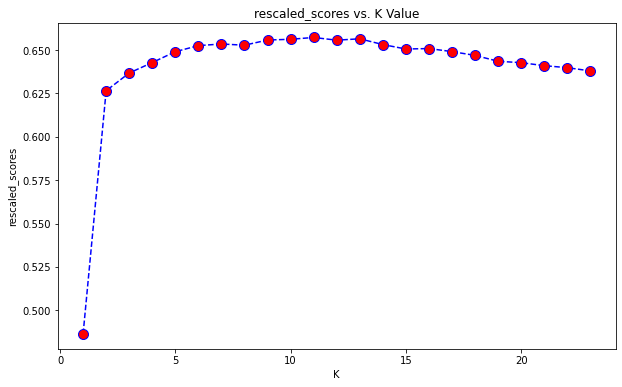

In [16]:
plt.figure(figsize=(10,6))
plt.plot(range(1,24),rescaled_scores,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('rescaled_scores vs. K Value')
plt.xlabel('K')
plt.ylabel('rescaled_scores')


In [7]:
rescaled_score = cv_results['test_score'].mean()
rescaled_score


0.649019431450802

In [ ]:
error_rate = []
for i in range(1,24):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X1_rescaled,y1)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))